In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.io import wavfile
import noisereduce as nr
import wave
import numpy as np
from pydub import AudioSegment
from matplotlib.pyplot import figure
from scipy.io.wavfile import read
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
absolute_path = os.path.dirname(
    "/Users/khangnguyen/lab/bahnar_tts/")
# absolute_path = os.path.dirname(
#     "E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/")
relative_path = "pattern"

fullpath = os.path.join(absolute_path, relative_path)


In [ ]:
absolute_path

: 

In [4]:
for count, filename in enumerate(os.listdir(fullpath)):
    print(filename)

ChiBi
.DS_Store
AnhSon


In [5]:
def calc_distances(sound_file):
    min_val = 10000

    fs, data = read(sound_file)
    data_size = len(data)

    focus_size = int(0.15 * fs)

    focuses = []
    distances = []
    idx = 0

    while idx < len(data):
        if data[idx] > min_val:
            mean_idx = idx + focus_size // 2
            focuses.append(float(mean_idx) / data_size)
            if len(focuses) > 1:
                last_focus = focuses[-2]
                actual_focus = focuses[-1]
                distances.append(actual_focus - last_focus)
            idx += focus_size
        else:
            idx += 1
    return distances

In [6]:
def accept_test(pattern, test, min_error):
    if len(pattern) > len(test):
        return False
    for i, dt in enumerate(pattern):
        if not dt - test[i] < min_error:
            return False
    return True


### plot wav files

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test4.wav
4598


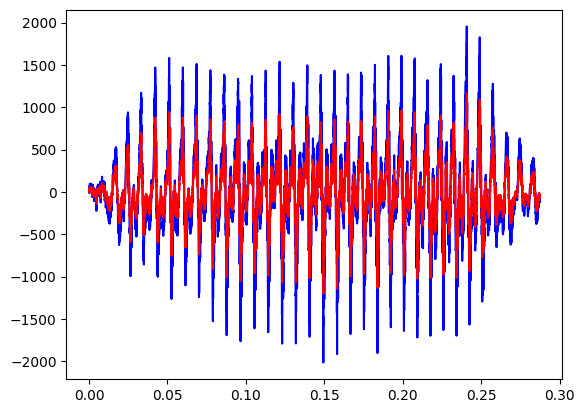

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test5.wav
4822


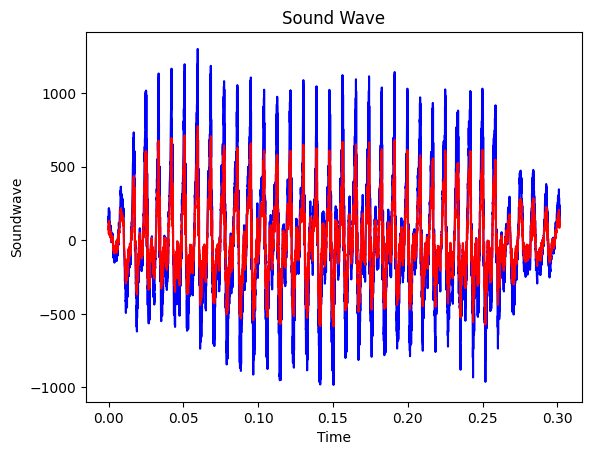

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test7.wav
5126


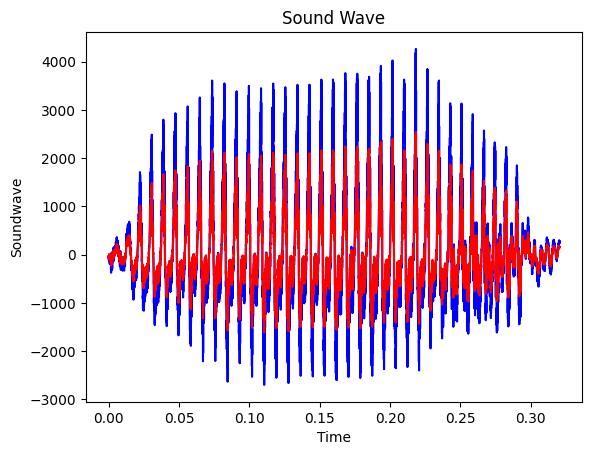

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test6.wav
5352


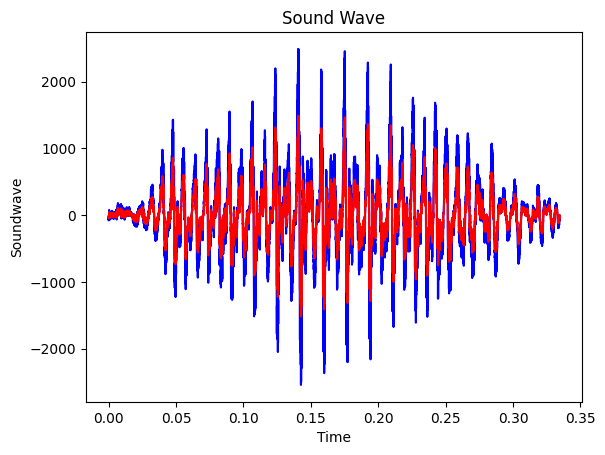

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test2.wav
5276


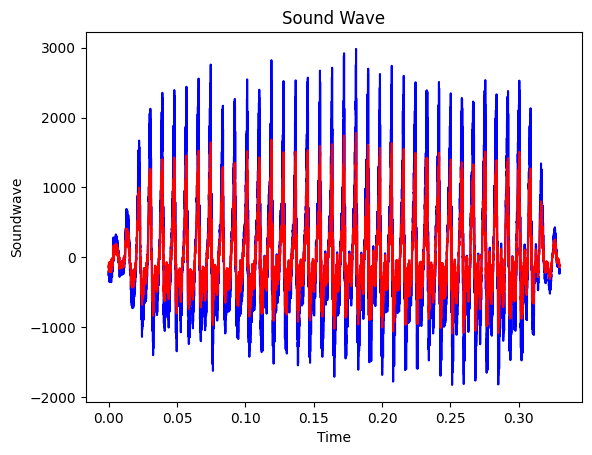

/Users/khangnguyen/lab/bahnar_tts/pattern/ChiBi/conv-wav/test3.wav
6632


KeyboardInterrupt: 

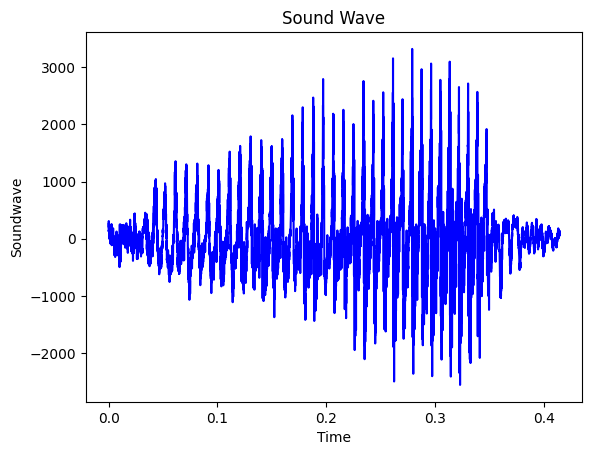

In [7]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon" or filename == "ChiBi":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "conv-wav":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    audiopath = os.path.join(subsubpath, f1)

                    print(audiopath)
                    raw = wave.open(audiopath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()

                    time = np.linspace(
                        0,  # start
                        len(signal) / f_rate,
                        num=len(signal)
                    )
                    print(len(signal))

                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'b')

                    # load data
                    r, d = wavfile.read(f"{audiopath}")
                    # perform noise reduction
                    reduced_noise = nr.reduce_noise(y=d, sr=r)
                    wavfile.write(
                        f"{subpath}/reduce-noise/test{c1}.wav", r, reduced_noise)

                    # do a comparison of the reduced noise files
                    adjusted_filepath = os.path.join(subpath, "reduce-noise")
                    adjusted_filepath = os.path.join(
                        adjusted_filepath, f"test{c1}.wav")

                    raw = wave.open(adjusted_filepath)

                    # reads all the frames
                    # -1 indicates all or max frames
                    signal = raw.readframes(-1)
                    signal = np.frombuffer(signal, dtype="int16")

                    # gets the frame rate
                    f_rate = raw.getframerate()


                    # using matplotlib to plot
                    # creates a new figure
                    plt.plot(time, signal, 'r')

                    # shows the plot
                    # in new window
                    plt.show()

                    # title of the plot
                    plt.title("Sound Wave")

                    # label of x-axis
                    plt.xlabel("Time")
                    plt.ylabel("Soundwave")


### Process audio files

In [ ]:
for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "reduce-noise":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    if f1.endswith('wav'):
                        audiopath = os.path.join(subsubpath, f1)
                        print(audiopath)
                        fs, data = read(audiopath)
                        # we will use the size of the array
                        # to determine the duration of the sound
                        data_size = len(data)

                        # build k-nearest neighbors
                        # ...

                        pattern = calc_distances(f1)
                        test = calc_distances()  # filename to be processed #type: ignore

                        min_error = 0.1

                        print(accept_test(pattern, test, min_error))


In [ ]:
pattern = calc_distances(f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav")
test = calc_distances(f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav")

In [ ]:
input_data = f"{absolute_path}/Ketquathuam/AnhSon/KH-CN/KH-CN03.wav"
input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"
# input_data = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
# input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"

raw = wave.open(input_data)
raw1 = wave.open(input_data1)

signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype="int16")
signal1 = raw1.readframes(-1)
signal1 = np.frombuffer(signal1, dtype="int16")

# gets the frame rate
f_rate = raw.getframerate()
f_rate1 = raw1.getframerate()

time = np.linspace(
    0,  # start
    len(signal) / f_rate,
    num=len(signal)
)
time1 = np.linspace(
    0,  # start
    len(signal1) / f_rate1,
    num=len(signal1)
)

# using matplotlib to plot
# creates a new figure
plt.plot(time, signal, 'b')
# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


plt.show()
plt.plot(time1, signal1, 'r')

# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")
plt.ylabel("Soundwave")


In [ ]:
t1 = os.path.join(absolute_path, "Ketquathuam")
t1 = os.path.join(t1, "Son")
t1 = os.path.join(t1, "KH-CN")
t1 = os.path.join(t1, "KH-CN03.wav")
print(calc_distances(t1))

In [ ]:
my_set = calc_distances(t1)

my_set[0]

In [ ]:
# start = 0
# end = 0

# if accept_test(pattern, t1, min_error):
#     min_val = 10000

#     fs, data = read(t1)
#     data_size = len(data)

#     # The number of indexes on 0.15 seconds
#     focus_size = int(0.15 * fs)

#     focuses = []
#     distances = []
#     idx = 0

#     while idx < len(data):
#         if data[idx] > min_val:
#             mean_idx = idx + focus_size // 2
#             focuses.append(float(mean_idx) / data_size)
#             if len(focuses) > 1:
#                 last_focus = focuses[-2]
#                 actual_focus = focuses[-1]
#                 distances.append(actual_focus - last_focus)
#                 start = start * 1000 #Works in milliseconds
#                 end = 
#                 end = end * 1000
#                 newAudio = AudioSegment.from_wav(t1)
#                 newAudio = newAudio[start:end]
#                 newAudio.export('newSong.wav', format="wav")
#             idx += focus_size
#         else:
#             idx += 1


In [ ]:
snippet = input_data1
source = input_data

# read the sample to look for
rate_snippet, snippet = wavfile.read(snippet)

snippet = snippet.reshape(-1, 1)
snippet = np.array(snippet[:,0], dtype='float')

# read the source
rate, source = wavfile.read(source)

source = source.reshape(-1, 1)
source = np.array(source[:,0], dtype='float')

# resample such that both signals are at the same sampling rate (if required)
if rate != rate_snippet:
    num = int(np.round(rate*len(snippet)/rate_snippet))
    snippet = signal.resample(snippet, num) # type: ignore

In [ ]:
x_snippet = np.arange(0, snippet.size) / rate_snippet # type: ignore
plt.plot(x_snippet, snippet)
plt.xlabel('seconds')
plt.title('snippet')

In [ ]:
x_source = np.arange(0, source.size) / rate# type: ignore
figure(figsize=(20, 6), dpi=80)
plt.plot(x_source, source)
plt.xlabel('seconds')
plt.title('source')

In [ ]:
from scipy import signal

In [ ]:
# compute the cross-correlation
z = signal.correlate(source, snippet, mode='same')

In [ ]:
source.size == z.size # type: ignore

In [ ]:
plt.plot(z)

In [ ]:
x_z = np.arange(0, z.size) / rate
plt.plot(x_z, z)   # type: ignore
plt.axhline(1.25e10, color='r')
plt.show()

In [ ]:
peaks = signal.find_peaks(
    z,
    height=1.25e10,
    distance=50000
)
peaks

In [ ]:
peaks_idxs = peaks[0]
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(x_z, z)
plt.plot(x_z[peaks_idxs], z[peaks_idxs], 'or')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(x_source, source)
plt.xlabel('seconds')
plt.title('source signal and correlatation')
for i, peak_idx in enumerate(peaks_idxs):
    start = (peak_idx-snippet.size/2) / rate #type: ignore
    center = (peak_idx) / rate
    end   = (peak_idx+snippet.size/2) / rate #type: ignore
    plt.axvline(start,  color='g')
    plt.axvline(center, color='y')
    plt.axvline(end,    color='r')
    print(f"peak {i}: start {start:.2f} end {end:.2f}")

In [ ]:
from pydub import AudioSegment

input_data = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
input_data1 = f"{absolute_path}/pattern/AnhSon/conv-wav/test.wav"

def split_audio_by_pattern(original_file, pattern_file):
    original = AudioSegment.from_wav(original_file)
    pattern = AudioSegment.from_wav(pattern_file)
    chunk_duration = len(pattern)
    chunks = original[::chunk_duration]
    for i, chunk in enumerate(chunks):
        chunk.export(f"{absolute_path}/dataset/Son/KH-CN/processed/split_{i}.wav", format="wav")

In [ ]:
snippet = f"{absolute_path}/pattern/AnhSon/reduce-noise/test0.wav"
source = input_data

In [ ]:
print(snippet, source)

In [ ]:
snippet = f"{absolute_path}/pattern/AnhSon/reduce-noise/"

In [ ]:
# audio_segment.export(f"{absolute_path}/dataset/Son/KH-CN/processed/pro{i}.wav", format="wav")

In [ ]:
# original_audio  = f"{absolute_path}/dataset/Son/KH-CN/KH-CN03.wav"
original_audio  = f"{absolute_path}/Ketquathuam/AnhSon/KH-CN/KH-CN03.wav"
print(original_audio)

In [ ]:
pattern_audios = []

for c, f in enumerate(os.listdir(snippet)):
    pattern_audios.append(f"{absolute_path}/pattern/AnhSon/reduce-noise/{f}")

pattern_audios

In [ ]:
# import numpy as np
# import librosa
# from fastdtw import fastdtw  #type: ignore
# import os

# def dtw_distance(x, y):
#     distance, _ = fastdtw(x, y, dist=lambda x, y: abs(x-y))
#     return distance

# def audio_segmentation(audio_file, pattern_files, segment_length=5.0, distance_threshold=10.0):
#     audio, sr = librosa.load(audio_file, sr=None)
#     audio_length = librosa.get_duration(audio, sr=sr)
#     n_segments = int(audio_length / segment_length)
#     sub_audio_files = []
#     start = 0
#     patterns = []
#     for pattern_file in pattern_files:
#         pattern, _ = librosa.load(pattern_file, sr=sr)
#         patterns.append(pattern)
#     for i in range(n_segments):
#         end = start + segment_length
#         start_idx = int(start * sr)
#         end_idx = int(end * sr)
#         segment = audio[start_idx:end_idx]
#         min_distance = np.inf
#         nearest_pattern = None
#         for pattern in patterns:
#             distance = dtw_distance(segment, pattern)
#             if distance < min_distance:
#                 min_distance = distance
#                 nearest_pattern = pattern
#         if min_distance < distance_threshold:
#             sub_audio = audio[start_idx:end_idx]
#             librosa.output.write_wav(f'{absolute_path}/dataset/Son/KH-CN/processed/file{i}.wav', sub_audio, sr) #type: ignore
#             sub_audio_files.append(sub_audio)
#         start = end
#     return sub_audio_files

In [ ]:
# import librosa
# import numpy as np
# import os
# import soundfile as sf

# def audio_segmentation(audio_file, pattern_files, distance_threshold, max_chunk_size=10, chunk_overlap=5):
#     # Load the original audio
#     original_audio, sr = librosa.load(audio_file)
    
#     # Load all the pattern audio files
#     pattern_audios = [librosa.load(f)[0] for f in pattern_files]
    
#     # Calculate the cosine similarity between the original audio and all the pattern audios
#     distance = np.array([librosa.metrics.pairwise.cosine_similarity(original_audio.reshape(1, -1), pa.reshape(1, -1)) for pa in pattern_audios])
    
#     # Find the pattern with the highest similarity to the original audio
#     best_pattern_index = np.argmax(distance)
#     best_pattern = pattern_audios[best_pattern_index]
    
#     # Determine the start and end time of the best pattern in the original audio
#     start, end = librosa.core.cross_correlate(original_audio, best_pattern)
    
#     # Extract the segment of the original audio that matches the best pattern
#     sub_audio = original_audio[start:end]
    
#     # Save the extracted segment to a new audio file
#     sf.write(f"{absolute_path}/Ketquathuam/file{}", sub_audio, sr)


In [ ]:
import numpy as np
import librosa
import os
import soundfile as sf

def audio_segmentation(audio_file, pattern_files):
    original_audio, sr = librosa.load(audio_file)
    pattern_audios = [librosa.load(f, sr=sr)[0] for f in pattern_files]
    
    starts = []
    ends = []
    distances = []
    for i, pattern_audio in enumerate(pattern_audios):
        distance = librosa.sequence.dtw(original_audio, pattern_audio, subseq=True)[0]
        starts.append(np.argmin(distance))
        ends.append(starts[-1]+len(pattern_audio))
        distances.append(np.min(distance))
    
    starts = np.array(starts)
    ends = np.array(ends)
    distances = np.array(distances)
    sort_idx = np.argsort(starts)
    starts = starts[sort_idx]
    ends = ends[sort_idx]
    distances = distances[sort_idx]
    pattern_files = [pattern_files[i] for i in sort_idx]
    
    sub_audios = []
    for i in range(len(starts)):
        if i == 0:
            sub_audio = original_audio[:starts[i]]
        else:
            sub_audio = original_audio[ends[i-1]:starts[i]]
        sf.write(f"{absolute_path}/Ketquathuam/result{i}.wav", sub_audio, sr)
    sub_audio = original_audio[ends[-1]:]
    sub_audios.append(sub_audio)
    sub_audio_filename = os.path.join(output_folder, f'{len(starts)}_end.wav')
    sf.write(sub_audio_filename, sub_audio, sr)

In [ ]:
f'{absolute_path}/Ketquathuam/AnhSon/KH-CN/processed/'

In [ ]:
# audio_segmentation(original_audio, pattern_audios, f'{absolute_path}/dataset/Son/KH-CN/processed/')
audio_segmentation(original_audio, pattern_audios)